# Import packages

In [1]:
from __future__ import print_function
# Plotting stuff
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.image import  imread 
from matplotlib.gridspec import GridSpec
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, HBox, VBox, Layout

# Data structure stuff
import pandas as pd
import numpy as np

# Stats stuff
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

# Image processing stuff
import cv2

# Misc stuff
import my_fun as mf
import os
import colorsys



# Load behavioral data

In [2]:
data = pd.read_csv('DATA_no_reach.csv')
#data['ratioDen'] = np.minimum(data['L_den']/data['R_den'], data['R_den']/data['L_den'])
#data['ratioNum'] = np.minimum(data['L_num']/data['R_num'], data['R_num']/data['L_num'])
data['distDen'] = np.abs(data['L_den'] - data['R_den'])
data['distNum'] = np.abs(data['L_num'] - data['R_num'])
data['gapL'] = np.abs(data['L_den'] - data['L_num'])
data['gapR'] = np.abs(data['R_den'] - data['R_num'])

data_disc = data[data['experiment'] == 'disc'].copy() # discrete ratios (dots)
data_cont = data[data['experiment'] == 'cont'].copy() # continuous ratios (shapes)


#print(((data_disc['condition'] == 'Congruent') & (data_disc['sideCorrect'] == 1) & (data_disc['L_den'] > data_disc['R_den'])).sum())
#print(((data_disc['condition'] == 'Congruent') & (data_disc['sideCorrect'] == 1) & (data_disc['L_den'] < data_disc['R_den'])).sum())
#print(((data_disc['condition'] == 'Congruent') & (data_disc['sideCorrect'] == 1) & (data_disc['L_den'] == data_disc['R_den'])).sum())

#data[['ratioSm', 'ratioLg', 'ratioNum', 'ratioDen',  'L_num','L_den','R_num','R_den']].head()




# Plots (behavior)

In [ ]:
# Accuracy
fig, ax = plt.subplots(2, 2, figsize=(13, 10))
fig.suptitle('Continuous Images                                         Discrete Images', y=0.935, fontsize=18)
ordert = 5090
DATAt = data_cont[data_cont['order']==ordert]
mf.myPlot(DATAt, ax = ax[0,0], var = 'correct', block = 50, xlab = '', ylab = 'Proportion correct',
        title = 'Order: ' + str(ordert), collor = (0/255, 0/255, 0/255, 1),
        xlim = [0.08,0.32], ylim = [0,1], legpos = 'lower left') 
mf.myPlot(DATAt, ax = ax[0,0], var = 'correct', block = 90, xlab = '', ylab = 'Proportion correct',
        title = 'Order: ' + str(ordert), collor = (255/255, 0/255, 0/255, 1),
        xlim = [0.08,0.32], ylim = [0,1], legpos = 'none')
mf.myPlot(DATAt, ax = ax[0,0], var = 'correct', block = 50, xlab = '', ylab = 'Proportion correct',
        title = 'Order: ' + str(ordert), collor = (34/255, 139/255, 24/255, 1),
        xlim = [0.08,0.32], ylim = [0,1], legpos = 'none')

ordert = 9050
DATAt = data_cont[data_cont['order']==ordert]
mf.myPlot(DATAt, ax = ax[1,0], var = 'correct', block = 90, xlab = 'Distance between ratios', ylab = 'Proportion correct',
        title = 'Order: ' + str(ordert), collor = (255/255, 0/255, 0/255, 1),
        xlim = [0.08,0.32], ylim = [0,1], legpos = 'none')
mf.myPlot(DATAt, ax = ax[1,0], var = 'correct', block = 50, xlab = 'Distance between ratios', ylab = 'Proportion correct',
        title = 'Order: ' + str(ordert), collor = (34/255, 139/255, 24/255, 1),
        xlim = [0.08,0.32], ylim = [0,1], legpos = 'none')

ordert = 5090
DATAt = data_disc[data_disc['order']==ordert]
mf.myPlot(DATAt, ax = ax[0,1], var = 'correct', block = 90, xlab = '', ylab = 'Proportion correct',
        title = 'Order: ' + str(ordert), collor = (255/255, 0/255, 0/255, 1),
        xlim = [0.08,0.32], ylim = [0,1], legpos = 'none')
mf.myPlot(DATAt, ax = ax[0,1], var = 'correct', block = 50, xlab = '', ylab = 'Proportion correct',
        title = 'Order: ' + str(ordert), collor = (34/255, 139/255, 24/255, 1),
        xlim = [0.08,0.32], ylim = [0,1], legpos = 'none')

ordert = 9050
DATAt = data_disc[data_disc['order']==ordert]
mf.myPlot(DATAt, ax = ax[1,1], var = 'correct', block = 90, xlab = 'Distance between ratios', ylab = 'Proportion correct',
        title = 'Order: ' + str(ordert), collor = (255/255, 0/255, 0/255, 1),
        xlim = [0.08,0.32], ylim = [0,1], legpos = 'none')
mf.myPlot(DATAt, ax = ax[1,1], var = 'correct', block = 50, xlab = 'Distance between ratios', ylab = 'Proportion correct',
        title = 'Order: ' + str(ordert), collor = (34/255, 139/255, 24/255, 1),
        xlim = [0.08,0.32], ylim = [0,1], legpos = 'none')

plt.tight_layout


# Analyses (behavior)

In [7]:
# Accuracy regression (discrete)
data_reg = data_disc
a = data_reg.groupby(['subjID','ratioDist','condition', 'block', 'order'], as_index=False).count()
total = a['correct']
a = data_reg.groupby(['subjID','ratioDist','condition', 'block', 'order'], as_index=False).sum()
success = a['correct']
success.name = 'sucesss'
failure = total - success
failure.name = 'failure'
a = data_reg.groupby(['subjID','ratioDist','condition', 'block', 'order'], as_index=False).mean() #dataframe

endog = pd.DataFrame()
endog = pd.concat([success, failure], axis =1) 
exog =  dmatrices('total~ratioDist*C(condition)*C(block)*C(order)',
                  a, return_type="dataframe") #design matrix
glm_binom = sm.GLM(endog, exog[1], family=sm.families.Binomial())
glm_binom_results = glm_binom.fit()
print('\n')
print('DISCRETE EXPERIMENT')
print(glm_binom_results.summary2())
print('\n')

# Accuracy regression (continuous)
data_reg = data_cont
a = data_reg.groupby(['subjID','ratioDist','condition', 'block', 'order'], as_index=False).count()
total = a['correct']
a = data_reg.groupby(['subjID','ratioDist','condition', 'block', 'order'], as_index=False).sum()
success = a['correct']
success.name = 'sucesss'
failure = total - success
failure.name = 'failure'
a = data_reg.groupby(['subjID','ratioDist','condition', 'block', 'order'], as_index=False).mean() #dataframe

endog = pd.DataFrame()
endog = pd.concat([success, failure], axis =1) 
exog =  dmatrices('total~ratioDist*C(condition)*C(block)*C(order)',
                  a, return_type="dataframe") #design matrix i.e. with x or independent variables. IMPORTANT: I used total as a placeholder, I'm only interested in the right hand part of the formula
glm_binom = sm.GLM(endog, exog[1], family=sm.families.Binomial())
glm_binom_results = glm_binom.fit()
print('CONTINUOS EXPERIMENT')
print(glm_binom_results.summary2())
print('\n')



# Additional robustness to gap effects (difference thinking)
data_reg = data_disc
a = data_reg.groupby(['subjID','ratioDist','condition', 'block', 'order', 'distNum', 'distDen', 'gapL', 'gapR'], as_index=False).count()
total = a['correct']
a = data_reg.groupby(['subjID','ratioDist','condition', 'block', 'order', 'distNum', 'distDen', 'gapL', 'gapR'], as_index=False).sum()
success = a['correct']
success.name = 'sucesss'
failure = total - success
failure.name = 'failure'
a = data_reg.groupby(['subjID','ratioDist','condition', 'block', 'order', 'distNum', 'distDen', 'gapL', 'gapR'], as_index=False).mean() #dataframe

endog = pd.DataFrame()
endog = pd.concat([success, failure], axis =1) 
exog =  dmatrices('total~ratioDist*C(condition)*C(block)*C(order) + distNum + distDen + gapL + gapR',
                  a, return_type="dataframe") #design matrix
glm_binom = sm.GLM(endog, exog[1], family=sm.families.Binomial())
glm_binom_results = glm_binom.fit()
a = pd.DataFrame(glm_binom_results.summary2().tables[1])
a.to_csv('tD.csv')
print('\n')
print('DISCRETE EXPERIMENT WITH GAP AND DENOMINATOR EFFECTS')
print(glm_binom_results.summary2())
print('\n')


data_reg = data_cont
a = data_reg.groupby(['subjID','ratioDist','condition', 'block', 'order', 'distNum', 'distDen', 'gapL', 'gapR'], as_index=False).count()
total = a['correct']
a = data_reg.groupby(['subjID','ratioDist','condition', 'block', 'order', 'distNum', 'distDen', 'gapL', 'gapR'], as_index=False).sum()
success = a['correct']
success.name = 'sucesss'
failure = total - success
failure.name = 'failure'
a = data_reg.groupby(['subjID','ratioDist','condition', 'block', 'order', 'distNum', 'distDen', 'gapL', 'gapR'], as_index=False).mean() #dataframe

endog = pd.DataFrame()
endog = pd.concat([success, failure], axis =1) 
exog =  dmatrices('total~ratioDist*C(condition)*C(block)*C(order) + distNum + distDen + gapL + gapR',
                  a, return_type="dataframe") #design matrix
glm_binom = sm.GLM(endog, exog[1], family=sm.families.Binomial())
glm_binom_results = glm_binom.fit()
a = pd.DataFrame(glm_binom_results.summary2().tables[1])
a.to_csv('tC.csv')
print('\n')
print('CONTINUOS EXPERIMENT WITH GAP AND DENOMINATOR EFFECTS')
print(glm_binom_results.summary2())
print('\n')



DISCRETE EXPERIMENT
                                          Results: Generalized linear model
Model:                              GLM                                    AIC:                            2970.5388 
Link Function:                      logit                                  BIC:                            -2070.0568
Dependent Variable:                 ['sucesss', 'failure']                 Log-Likelihood:                 -1469.3   
Date:                               2020-07-06 08:14                       LL-Null:                        -1943.6   
No. Observations:                   599                                    Deviance:                       1658.4    
Df Model:                           15                                     Pearson chi2:                   1.77e+03  
Df Residuals:                       583                                    Scale:                          1.0000    
Method:                             IRLS                                    

# Load images data

In [8]:
#Generate counts for a specific category
folder_name = 'Warhol' #We included 4 folders as examples (go to Kaggle or Caltech256 website for others)
dirr = 'Example_Images/' + folder_name + '/'
name_files = [name for name in os.listdir(dirr) if (os.path.isfile(dirr+name)) & (name != '.DS_Store')]
n_files = len(name_files)

# Counts
results = mf.img_counts(dirr, name_files, progress = False) #This takes a while
hue_bands = 4 #total number of hue bands (see img_counts)
NUM = [[], [], [], []]  # pixels of hue
DEN = [[], [], [], []]
NUM_B = [[], [], [], []]  # brightness of hue
DEN_B = [[], [], [], []]
NUM_S = [[], [], [], []]  # saturation of hue
DEN_S = [[], [], [], []]
for hb in range(hue_bands):
    NUM[hb].append(results[0][hb])
    DEN[hb].append(results[1][hb])
    
    NUM_B[hb].append(results[2][hb])
    DEN_B[hb].append(results[3][hb])
    
    NUM_S[hb].append(results[4][hb])
    DEN_S[hb].append(results[5][hb])


# Posteriors for all categories by HSV dimensions. 
# In "Example of one image category"  we show how we calculated
# posteriors. Specifically, see the function dropdown_callback 
# and the call to my_posterior in my_fun.py.

caltech256_h = pd.read_csv('tableCaltech_hue.csv')
caltech256_s = pd.read_csv('tableCaltech_sat.csv')
caltech256_v = pd.read_csv('tableCaltech_bright.csv')
paints_h = pd.read_csv('tablePaints_hue.csv')
paints_s = pd.read_csv('tablePaints_sat.csv')
paints_v = pd.read_csv('tablePaints_bright.csv')



# Example of one category of images

In [9]:
# Random images to initialize (changeable in the widget below)
rnd1 = np.random.randint(n_files)
rnd2 = np.random.randint(n_files)
name_files.sort()
NUMS = [NUM, NUM_B, NUM_S]
DENS = [DEN, DEN_B, DEN_S]

wHue = widgets.Dropdown(options=[('Red-yellow', 0), ('Yellow-green', 1), ('Green-blue', 2), ('Blue-purple',3)],
                        value=3,
                        description='Hue band: ')
wDim = widgets.Dropdown(options=[('Hue', 'hue'), ('Saturation', 'saturation'), ('Brightness', 'brightness')],
                        value='hue',
                        description='HSV dimension: ')
wImg1 = widgets.Dropdown(options= name_files, value=name_files[rnd1], description='Image 1: ')
wImg2 = widgets.Dropdown(options= name_files,value=name_files[rnd2],description='Image 2: ')

out = widgets.interactive_output(mf.dropdown_callback, 
                                 {'hue': wHue, 'hsv_dim': wDim, 
                                  'img1': wImg1, 'img2': wImg2, 
                                  'dirr': fixed(dirr), 'NUMS': fixed(NUMS), 'DENS': fixed(DENS)})

left_widgets = VBox([wHue, wDim])
right_widgets = VBox([wImg1, wImg2])
top = HBox([left_widgets, right_widgets])
VBox([top, out])

# Overall posterior p(RL|...) for all images across HSV dimensions

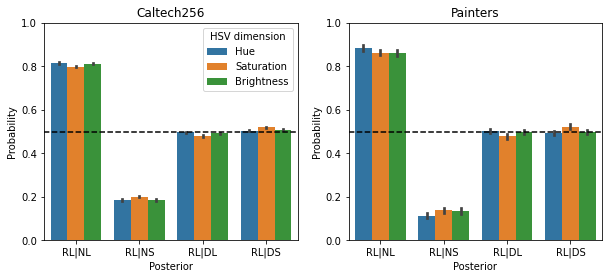

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
caltech256 = pd.concat([caltech256_h, caltech256_s, caltech256_v])
caltech256 = caltech256.rename(columns={'Num':'HSV dimension'})
caltech256 = pd.melt(caltech256, 
                     id_vars = 'HSV dimension', 
                     value_vars = ['RL|NL','RL|NS','RL|DL','RL|DS'], #gather these columns in a single one
                     var_name = 'Posterior', value_name = 'Probability')
b = sns.barplot(x = 'Posterior', y = 'Probability', hue = 'HSV dimension', ci = 95, data = caltech256, ax = ax[0]);
ax[0].set_title('Caltech256')
ax[0].set_ylim([0,1])
ax[0].set_xlim([-0.5,3.5])
ax[0].plot(np.linspace(-1,4,100), np.repeat(0.5, 100), '--k')
h, l = b.get_legend_handles_labels()
b.legend(h, ['Hue', 'Saturation', 'Brightness'], title="HSV dimension")



paints = pd.concat([paints_h, paints_s, paints_v])
paints = paints.rename(columns={'Num':'HSV dimension'})
paints = pd.melt(paints, 
                 id_vars = 'HSV dimension', 
                 value_vars = ['RL|NL','RL|NS','RL|DL','RL|DS'], #gather these columns in a single one
                 var_name = 'Posterior', value_name = 'Probability')
sns.barplot(x = 'Posterior', y = 'Probability', hue = 'HSV dimension', ci = 95, data = paints, ax = ax[1]);
ax[1].set_title('Painters');
ax[1].set_ylim([0,1])
ax[1].set_xlim([-0.5,3.5])
ax[1].plot(np.linspace(-1,4,100), np.repeat(0.5, 100), '--k')
ax[1].get_legend().remove()
fig.savefig('posteriors_bars.pdf')


# Posterior p(RL|...) in math education material

In [18]:
# Education material 
Ed = pd.read_csv('Example_Non-Images/ArithmeticTextbooks.csv')
# Education material with explicit fraction comparisons exercises
Ed_exe = Ed[~np.isnan(Ed['NumeratorB'])].copy().reset_index()  
# Education material without explicit comparison exercises but with fractions
Ed_noexe = Ed[np.isnan(Ed['NumeratorB'])].copy().reset_index()  

# Posteriors for education material with explicit fraction comparisons exercises
cols = ['NS_DL','NL_DL','NS_DS','NL_DS', 'NE_DL', 'NE_DS', 'NS_DE','NL_DE', 'NE_DE']
data_temp = Ed_exe.groupby(['Book_short']).sum()[cols]
books = pd.Series(data_temp.index)
posterior = []
for idx, book in enumerate(books):
    distr = data_temp.loc[data_temp.index[idx],cols]
    distr_all = mf.my_total(distr) 
    posterior.append([mf.my_posterior('NL', distr, distr_all), mf.my_posterior('NS', distr, distr_all),
                      mf.my_posterior('DL', distr, distr_all), mf.my_posterior('DS', distr, distr_all)])
posterior = pd.DataFrame(posterior)
total = pd.DataFrame(posterior.mean()).transpose()
total.index = ['Overall']
posterior = posterior.append([total]) 
posterior = pd.concat([books, pd.DataFrame(posterior)], axis = 1)
posterior.columns = ['Material','RL|NL','RL|NS','RL|DL','RL|DS']
posterior.loc['Overall','Material'] = 'Average'


# Posteriors for education material WITHOUT explicit fraction comparisons exercises.
# We followed a similar strategy as with images i.e. all pairwise comparisons.
# It means that, if someone took pair of fractions from these sources to generate fraction comparison
# exercises, the posteriors would be as follow.
books = pd.Series(Ed_noexe['Book_short'].unique())
domain = ['Ed', 'Num', 'Den', 'No_ex'] #placeholder for num_den_dist function
posterior_noex = []
for idx, book in enumerate(books): 
    # This may take a while 
    print((idx+1)/len(books), book)
    data_temp = Ed_noexe.loc[Ed_noexe['Book_short']==book,:]
    distr_temp = mf.img_dist(data_temp['Numerator'], 
                             data_temp['Denominator'], domain)
    distr = distr_temp['Frequency']
    distr_all = distr_temp['Total']
    posterior_noex.append([mf.my_posterior('NL', distr, distr_all), mf.my_posterior('NS', distr, distr_all),
                           mf.my_posterior('DL', distr, distr_all), mf.my_posterior('DS', distr, distr_all)])
posterior_noex = pd.concat([books, pd.DataFrame(posterior_noex)], axis = 1)
posterior_noex.columns = ['Material','RL|NL','RL|NS','RL|DL','RL|DS']




0.25 AW
0.5 NCERT
0.75 CG
1.0 AB1


# Posterior p(RL|...) in culture and other domains

In [19]:
# We did the same pairwise procedure for all the remaining datasets, education and non education related
# For brevity of this jupyter notebook, we provide all the estimations in the next .csv file
# The raw data is available through OSF (https://osf.io/3x9t7/)

All_posteriors = pd.read_csv('Posterior_all_categories.csv')


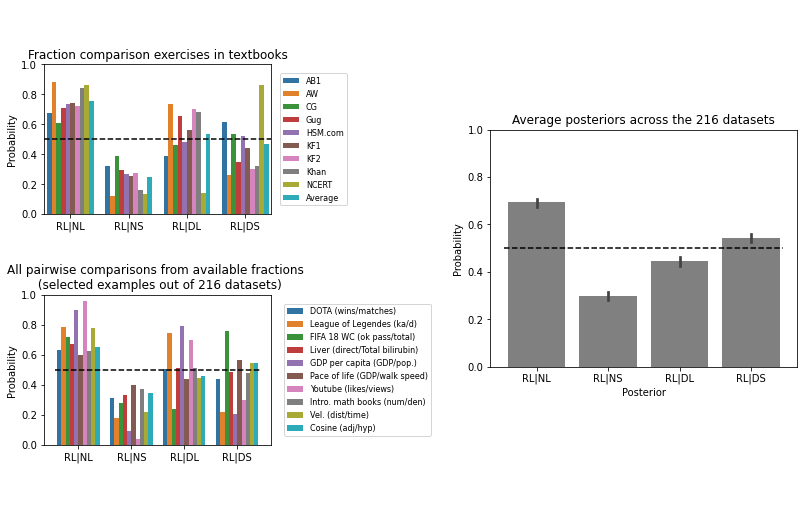

In [20]:
#Plots
cols = ['Subject','RL|NL','RL|NS','RL|DL','RL|DS']
cat = ['DOTA videogame', 'Videogame League of Legends', 
       'FIFA WC 2018', 'Liver condition','GDP_Capita', 'Pace_Life',
      'Youtube_L', 'Fractions', 'Vel.', 'Cosine'] #selected examples
idx = All_posteriors['Subject'] == cat[0]
for c in cat[1:]:
    idx = (idx) | (All_posteriors['Subject'] == c)

fig = plt.figure(constrained_layout=True, figsize = (12,7))
heights = [1.5, 1, 1, 1, 1.5] #of rows (relative)
widths = [1, 0.6, 1] #of columns (relative)
gs = GridSpec(5, 3, figure = fig, 
              width_ratios = widths, height_ratios = heights)
ax1 = fig.add_subplot(gs[0:2, 0])
ax2 = fig.add_subplot(gs[3:5, 0])
ax3 = fig.add_subplot(gs[:, 1])
ax4 = fig.add_subplot(gs[1:3, 2])
ax3.axis('off')

to_plot = pd.melt(posterior, 
                 id_vars = 'Material', 
                 value_vars = ['RL|NL','RL|NS','RL|DL','RL|DS'], #gather these columns in a single one
                 var_name = 'Posterior', value_name = 'Probability')
g = sns.barplot(x = 'Posterior', y = 'Probability', hue = 'Material', ci = 95, data = to_plot, ax = ax1);
ax1.set_xlim([-0.45,3.45])
ax1.set_ylim([0,1])
ax1.set_xlabel("")
ax1.set_title('Fraction comparison exercises in textbooks')
ax1.plot(np.linspace(-0.45,3.45, 80), np.repeat(0.5,80),'--k')
box = g.get_position()
g.set_position([box.x0, box.y0, box.width * 1, box.height]) # resize position
# Put a legend to the right side
g.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), ncol=1, fontsize = 8)

data_temp = All_posteriors.loc[idx, :][cols]
to_plot = pd.melt(data_temp, 
                 id_vars = 'Subject', 
                 value_vars = ['RL|NL','RL|NS','RL|DL','RL|DS'], #gather these columns in a single one
                 var_name = 'Posterior', value_name = 'Probability')
g = sns.barplot(x = 'Posterior', y = 'Probability', hue = 'Subject', data = to_plot, ax = ax2);
ax2.plot(np.linspace(-0.45,3.45, 80), np.repeat(0.5,80),'--k')
ax2.set_xlabel("")
ax2.set_ylim([0,1])
ax2.set_title('All pairwise comparisons from available fractions \n (selected examples out of 216 datasets)')
box = g.get_position()
g.set_position([box.x0, box.y0, box.width * 1, box.height]) # resize position
# Put a legend to the right side
h, l = g.get_legend_handles_labels()
g.legend(h, ['DOTA (wins/matches)', 'League of Legendes (ka/d)', 'FIFA 18 WC (ok pass/total)',
            'Liver (direct/Total bilirubin)', 'GDP per capita (GDP/pop.)','Pace of life (GDP/walk speed)',
            'Youtube (likes/views)', 'Intro. math books (num/den)', 'Vel. (dist/time)', 'Cosine (adj/hyp)'], title="",
        loc='center right', bbox_to_anchor=(1.72, 0.5), ncol=1, fontsize = 8)
g;

idx = ~(All_posteriors['Cat.']=='E') & ~(All_posteriors['Cat.']=='M') & ~(All_posteriors['Cat.']=='NM')
to_plot = All_posteriors.loc[idx, cols[1:]]
g = sns.barplot(data = All_posteriors[cols[1:]], ci = 95, ax = ax4, color = 'gray');
ax4.plot(np.linspace(-0.45,3.45, 80), np.repeat(0.5,80),'--k')
ax4.set_ylim([0,1])
ax4.set_title('Average posteriors across the 216 datasets')
ax4.set_xlabel("Posterior")
ax4.set_ylabel("Probability")
#plt.tight_layout()
fig.savefig('all_posteriors.pdf')

